In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("C:\\Users\\hp\\Desktop\\insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dataset.shape

(1338, 7)

## EDA 

In [28]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,10)

### Univariate

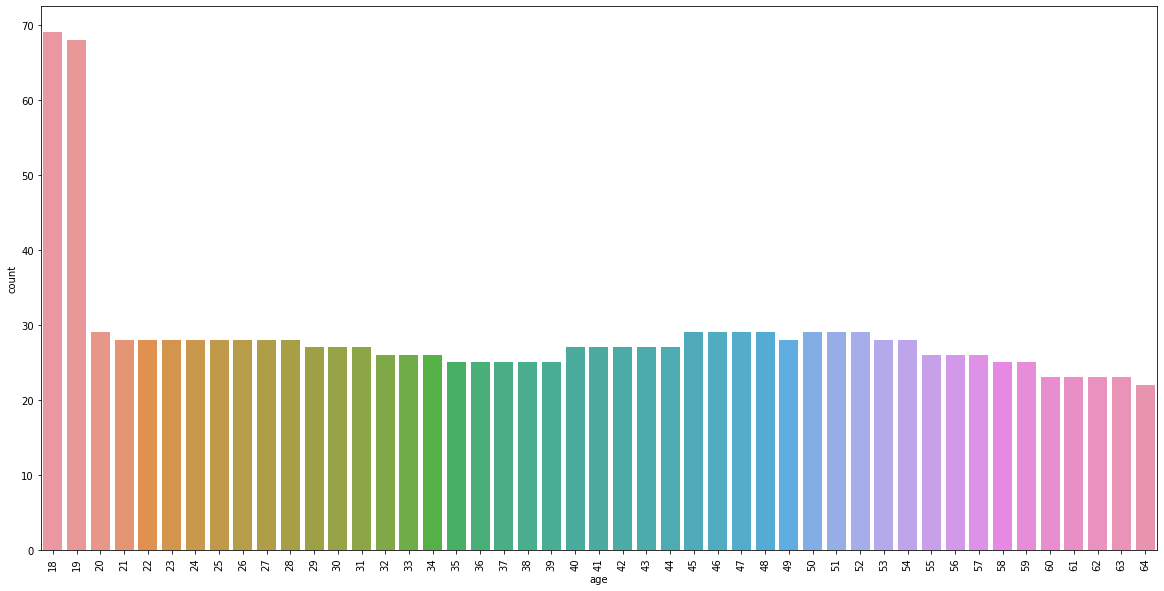

In [29]:
# Age countplot
sns.countplot(x = dataset.age)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

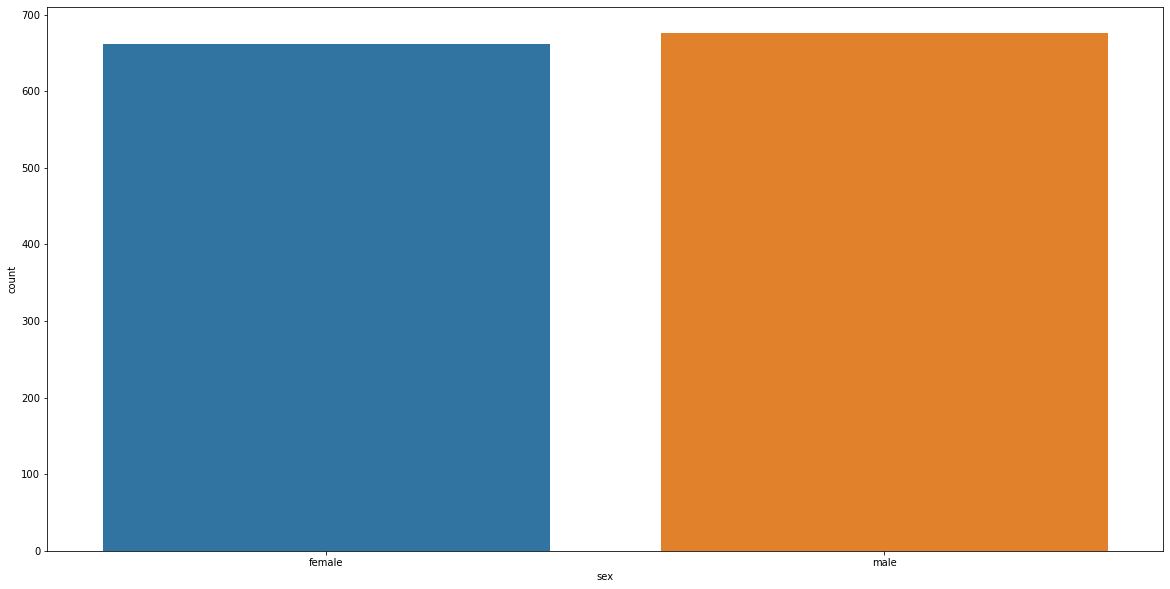

In [30]:
# Sex Countplot
sns.countplot(x = dataset.sex)

<AxesSubplot:xlabel='smoker', ylabel='count'>

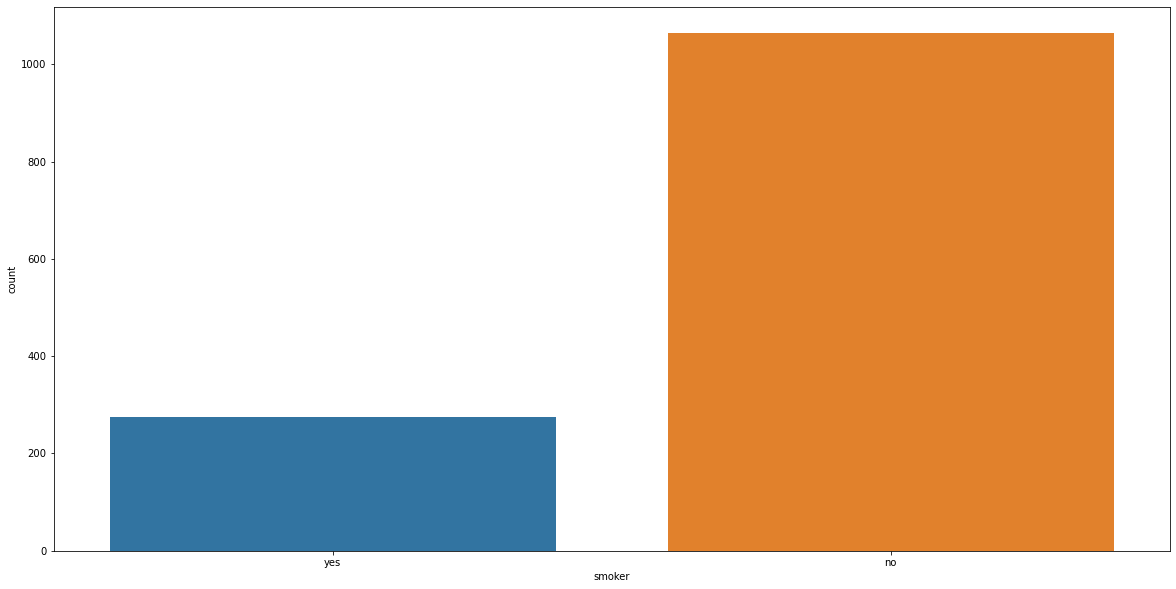

In [31]:
# Smokers Countplot
sns.countplot(x = dataset.smoker)

<AxesSubplot:xlabel='region', ylabel='count'>

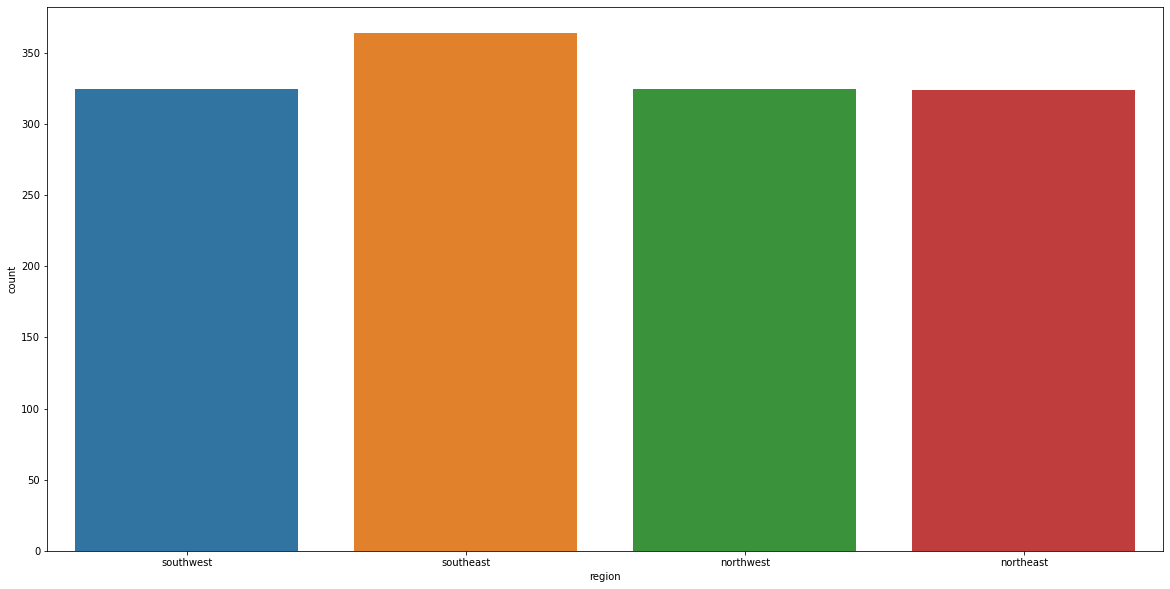

In [32]:
# REgion Countplot
sns.countplot(x = dataset.region)

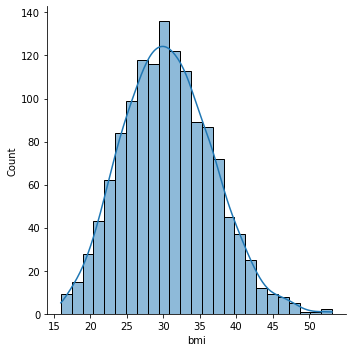

In [33]:
# BMI Displot
sns.displot(x = dataset.bmi, kde = True)

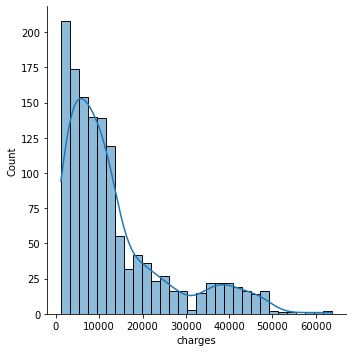

In [34]:
# Charges Displot
sns.displot(x = dataset.charges, kde = True)

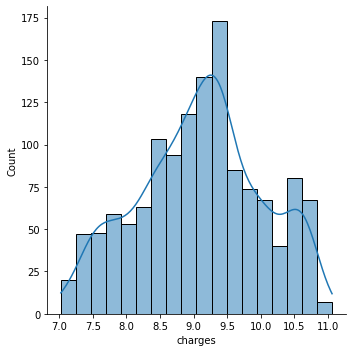

In [35]:
log_data = np.log1p(dataset.charges)
sns.displot(x = log_data, kde = True)

## Bivariate

<AxesSubplot:xlabel='age', ylabel='count'>

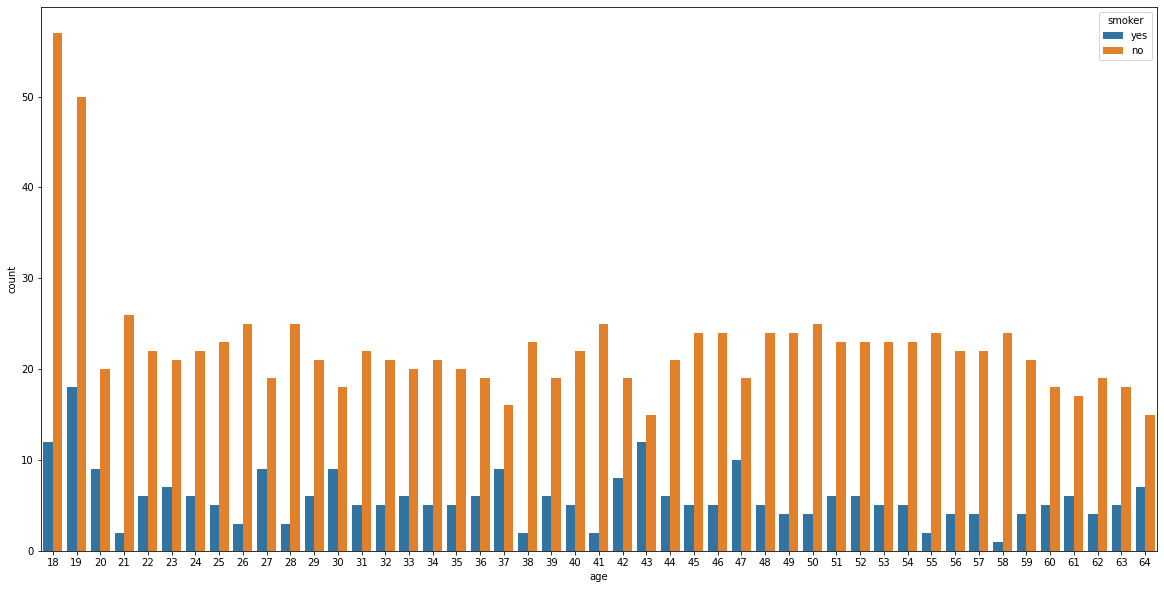

In [36]:
# Relaton between Age and Smokers
sns.countplot(x = 'age', hue = 'smoker', data = dataset)

<AxesSubplot:xlabel='sex', ylabel='count'>

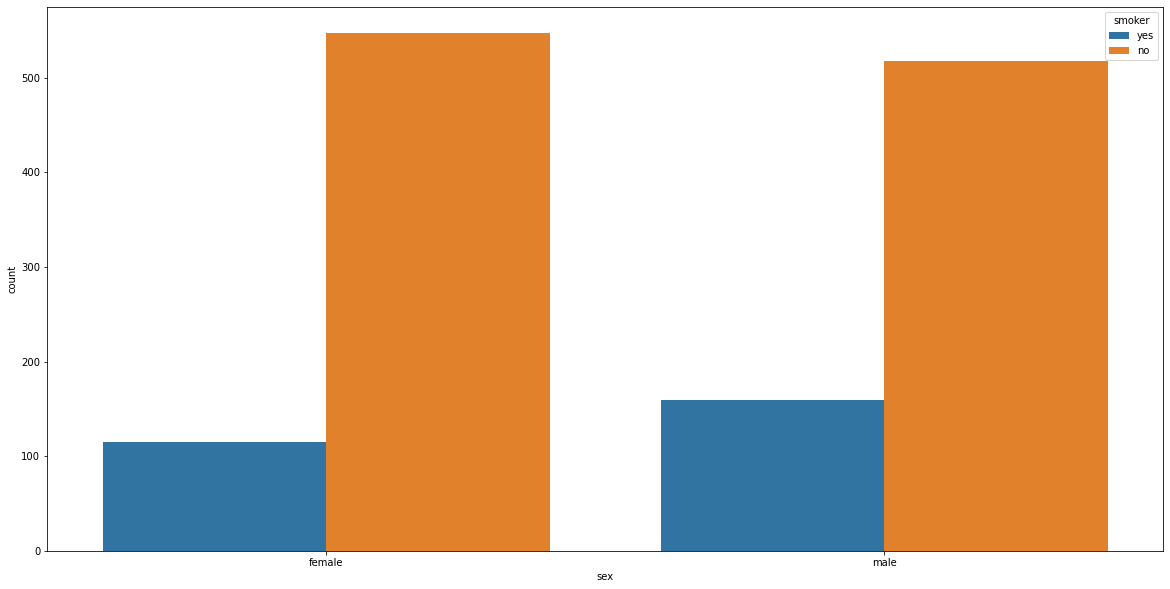

In [37]:
# Relaton between Sex and Smokers
sns.countplot(x = 'sex', hue = 'smoker', data = dataset)

## Multivariate

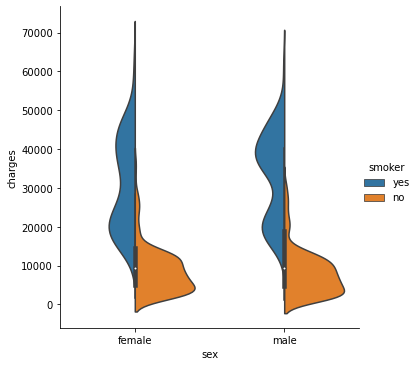

In [39]:
#Relation between Charges, Sex, Smoker
sns.catplot(data = dataset, kind = 'violin', x = 'sex', y = 'charges', hue = 'smoker', split = True)

<AxesSubplot:xlabel='age', ylabel='charges'>

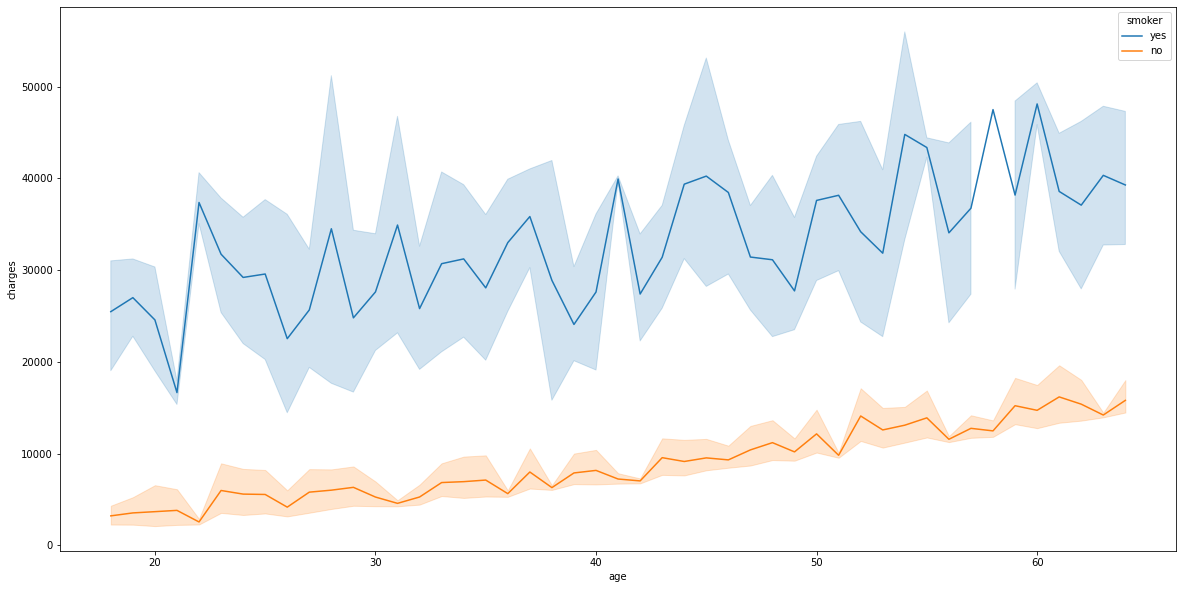

In [41]:
# Relation between Age, Smoker and Charges
sns.lineplot(x = 'age', y = 'charges', hue = 'smoker', data = dataset)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

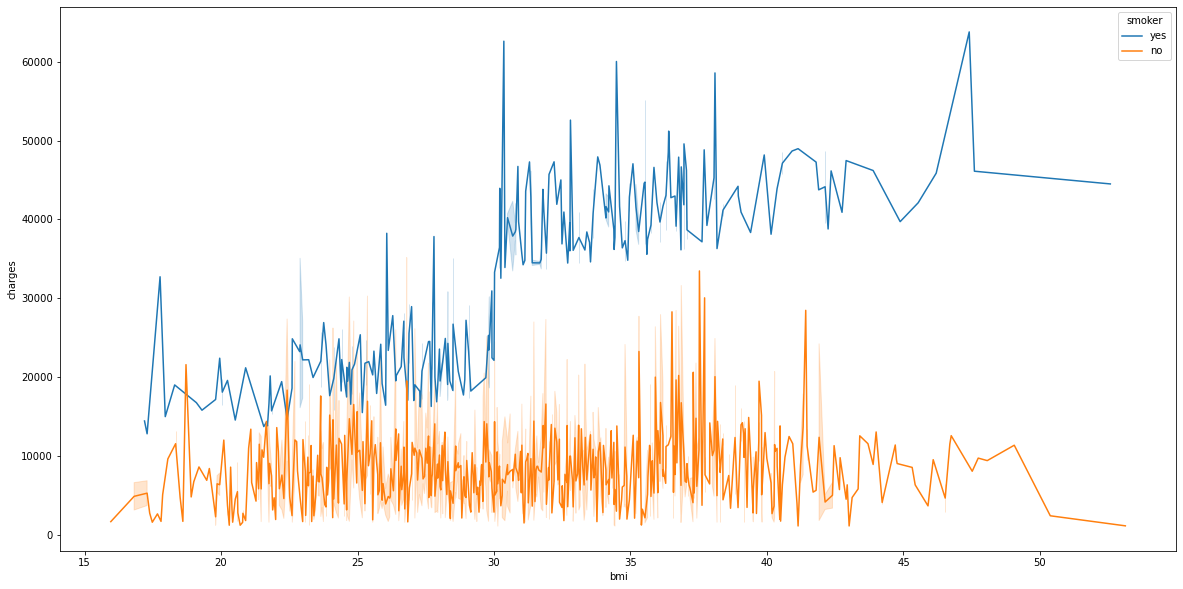

In [42]:
# Relation between BMI, Charges and Smoker
sns.lineplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dataset)

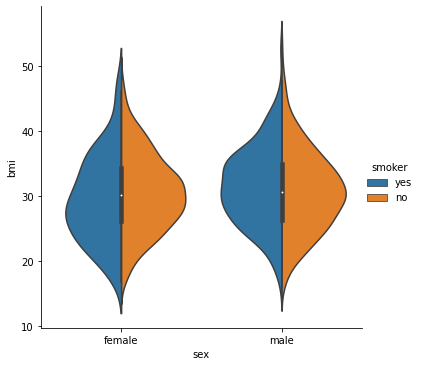

In [43]:
#Relation between BMI, Sex, Smoker
sns.catplot(data = dataset, kind = 'violin', x = 'sex', y = 'bmi', hue = 'smoker', split = True)

## Feature Engineering

In [48]:
dataset.drop("region", axis = 1 ,inplace = True)

In [50]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [51]:
dataset['sex'].replace(('female','male'), (0,1), inplace = True)

In [52]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,yes,16884.92400
1,18,1,33.770,1,no,1725.55230
2,28,1,33.000,3,no,4449.46200
3,33,1,22.705,0,no,21984.47061
4,32,1,28.880,0,no,3866.85520


In [53]:
dataset['smoker'].replace(('yes','no'), (1,0), inplace = True)

In [54]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


## Building Model 

In [55]:
X = dataset.drop('charges', axis= 1)
Y = dataset['charges']

In [56]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [58]:
model.score(xtest,ytest)

0.7978644236809904

In [60]:
from sklearn.metrics import mean_squared_error

ypred = model.predict(xtest)
score = mean_squared_error(ytest,ypred)
rmse = np.sqrt(score)
print("Root mean square error: ", rmse)

Root mean square error:  5671.492452926755
